# Lab 2; Adult Data Set

In [1]:
# Import stuff
import pandas as p
import numpy as np
from matplotlib import pyplot as pp

In [2]:
data = p.read_csv('adult.data', header = None,  skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
            'capital-loss', 'hours/week', 'native-country', 'prediction'
            ]
)
#data.describe()  #This is here as a tester to ensure proper data import...works but very ugly :(

In [3]:
# stats about the data that are useful to this lab
def st(data):
    totalPeople = len(data)
    totalMale = len(data[data['sex'] == 'Male'])
    totalFemale = len(data[data['sex'] == 'Female'])
    
    
    
    print(f'Total People ~> {totalPeople}')
    print(f'Total Male ~> {totalMale}')
    print(f'Total Female ~> {totalFemale}')

In [4]:
st(data)

Total People ~> 32561
Total Male ~> 21790
Total Female ~> 10771


In [5]:
# 4(a)
def jobRank(data):
    
    # get values of >50K, <=50K, and the total
    x = data[['occupation','prediction']][data['prediction'] == '>50K'].groupby('occupation').count() 
    y = data[['occupation', 'prediction']][data['prediction'] == '<=50K'].groupby('occupation').count()
    total = (data[['occupation', 'prediction']][data['prediction'] == '<=50K'].groupby('occupation').count())+(data[['occupation', 'prediction']][data['prediction'] == '>50K'].groupby('occupation').count())
    #print(x) print(y) print(total) # test to see if works
    
    # create a new DataFrame object
    rank=p.DataFrame()
    rank['wealthy'] = x
    rank['poor'] = y
    rank['total'] = total
    rank['wealthy'] = rank['wealthy'] / rank['total']
    rank['poor'] = rank['poor'] / rank['total']
    #print(rank) #test to see if works
    
    #print((1 - rank[['wealthy', 'poor']].sort_values('wealthy', ascending = False)['wealthy'])) #test
    
    #created horizontal bar graph
    graph = rank[['wealthy','poor']].sort_values('wealthy', ascending=True).plot.barh(figsize=(10,30), stacked=True, grid=False, legend=False)
    graph.bar_label(graph.containers[0], 
             labels=np.round((1-rank[['wealthy','poor']].sort_values('wealthy', ascending=True)['wealthy']),2), 
             color='white', fontsize=16, fmt='%2.2f', padding=5)
    graph.set_facecolor('white')

    # Display info to user
    print('Numbers on graph indicate the percent of people whom make <=50K a year.\nThe lower the number, the better the odds of making >50K a year.\nTherefore, Exec-managerial has the best odds whilst Priv-house-serv has the worst.\n\n')

Numbers on graph indicate the percent of people whom make <=50K a year.
The lower the number, the better the odds of making >50K a year.
Therefore, Exec-managerial has the best odds whilst Priv-house-serv has the worst.




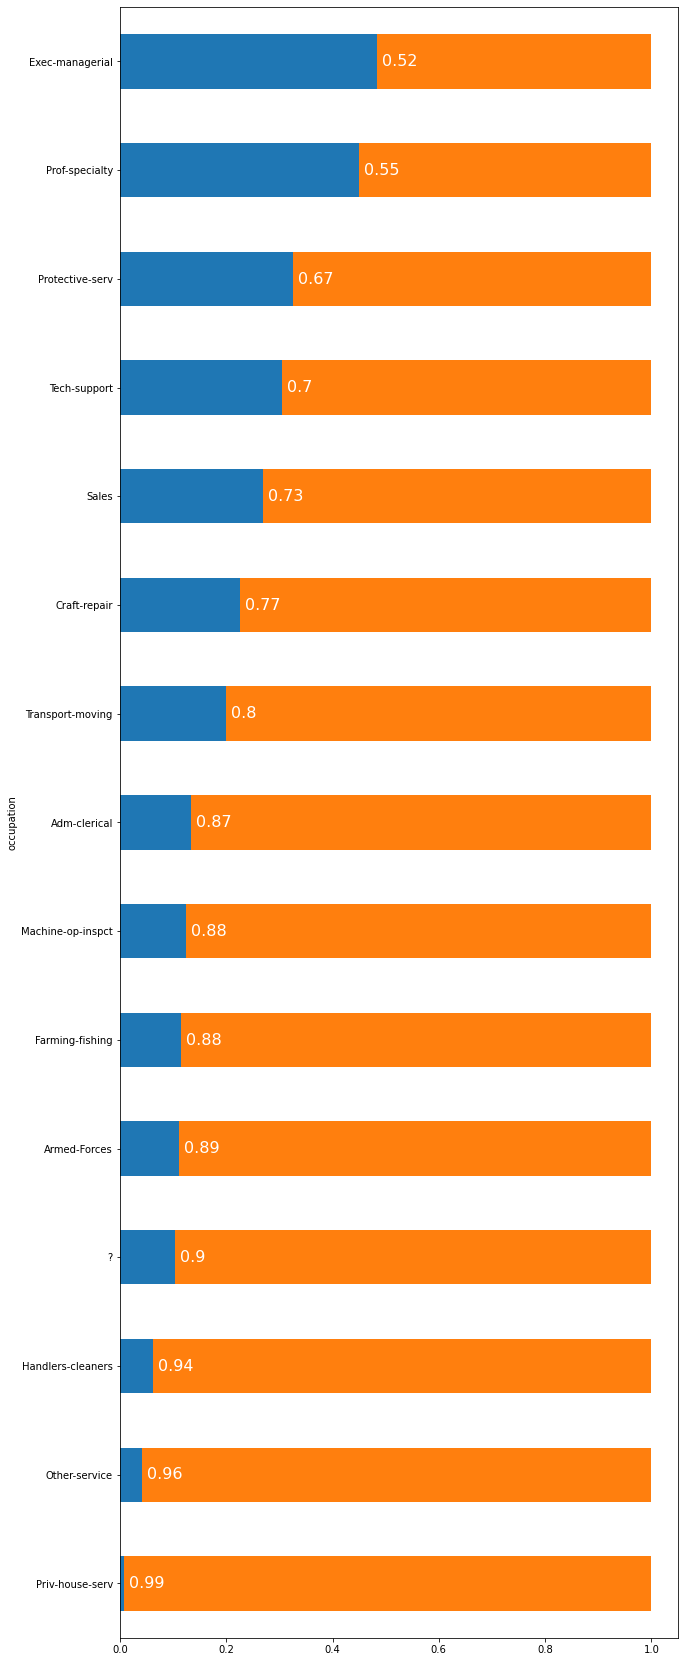

In [6]:
jobRank(data)

In [7]:
# 4(b)
def medianAge(data):
    # median age no sex section
    bigBallerAge = data['age'][data['prediction'] == '>50K'].median()# median age of >50K
    smallBallerAge = data['age'][data['prediction'] == '<=50K'].median()# median age of <=50K
    print(f"Average age of all people whom make >50K annually ~> {bigBallerAge}")
    print(f"Average Age of all people whom make <=50K annually ~> {smallBallerAge}")
    
    # median age sex section
    bigBallerMen = data['age'][data['sex'] == 'Male'][data['prediction'] == '>50K'].median()
    bigBallerWomen = data['age'][data['sex'] == 'Female'][data['prediction'] == '>50K'].median()
    smallBallerMen = data['age'][data['sex'] == 'Male'][data['prediction'] == '<=50K'].median()
    smallBallerWomen = data['age'][data['sex'] == 'Female'][data['prediction'] == '<=50K'].median()
    print(f"Average age of men whom make >50K annually ~> {bigBallerMen}")
    print(f"Average age of women whom make >50K annually ~> {bigBallerWomen}")
    print(f"Average age of men whom make <=50K annually ~> {smallBallerMen}")
    print(f"Average age of men whom make <=50K annually ~> {smallBallerWomen}")

In [8]:
medianAge(data)

Average age of all people whom make >50K annually ~> 44.0
Average Age of all people whom make <=50K annually ~> 34.0
Average age of men whom make >50K annually ~> 44.0
Average age of women whom make >50K annually ~> 41.0
Average age of men whom make <=50K annually ~> 35.0
Average age of men whom make <=50K annually ~> 34.0


In [9]:
# 4(c)
def ageStats(data):
    # mean education section
    meanEdSmall = data['education-num'][data['prediction'] == '<=50K'].mean()
    meanEdBig = data['education-num'][data['prediction'] == '>50K'].mean()
    print(f'Mean education >50K ~> {meanEdBig}')
    print(f'Mean education <=50K ~> {meanEdSmall}')
    
    # median education section
    medianEdSmall = data['education-num'][data['prediction'] == '<=50K'].median()
    medianEdBig = data['education-num'][data['prediction'] == '>50K'].median()
    print(f'Median education >50K ~> {medianEdBig}')
    print(f'Median education <=50K ~> {medianEdSmall}')

In [10]:
ageStats(data)

Mean education >50K ~> 11.611656676444332
Mean education <=50K ~> 9.595064724919094
Median education >50K ~> 12.0
Median education <=50K ~> 9.0


In [11]:
# 4(d)
def schoolDis(data):
    #gets number of education nums
    #size = len(data['education-num'].unique())
    #print(size)
    
    # distribution by education and income only
    poorDis = data['education-num'][data['prediction'] == '<=50K']
    richDis = data['education-num'][data['prediction'] == '>50K']
    
    poorDis.plot.hist(bins = 16, grid = False)
    richDis.plot.hist(bins = 16, grid = False)
    pp.legend(['<=50K', '>50K'])
    pp.xlabel('Education')

Key Education levels:
1 ~> Pre-school
9 ~> HS-grad
13 ~> BA
14 ~> MS
16 ~> PHD

As expected, it is quite rare to see someone with less than a HS-grad level to make >50K
Interestingly enough, there is a HUGE spike in both >50K & <=50K with the BA level
This may be because adults may stop getting their education and pursue a career...
or they haven't been able to find a job quite yet.


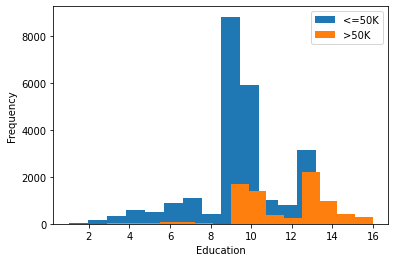

In [12]:
schoolDis(data)
print(f'Key Education levels:\n1 ~> Pre-school\n9 ~> HS-grad\n13 ~> BA\n14 ~> MS\n16 ~> PHD\n===============================================')
print("\nAs expected, it is quite rare to see someone with less than a HS-grad level to make >50K\nInterestingly enough, there is a HUGE spike in both >50K & <=50K with the BA level")
print("This may be because adults may stop getting their education and pursue a career...\nor they haven't been able to find a job quite yet.")

In [13]:
# 4(d) part 2
def schoolgenderDis(data):
    # distribution by educaiton, income, and gender
    poormanDis = data['education-num'][data['sex'] == 'Male'][data['prediction'] == '<=50K'].plot.hist(bins = 16)
    poorwomanDis = data['education-num'][data['sex'] == 'Female'][data['prediction'] == '<=50K'].plot.hist(bins = 16)
    richmanDis = data['education-num'][data['sex'] == 'Male'][data['prediction'] == '>50K'].plot.hist(bins = 16)
    richwomanDis = data['education-num'][data['sex'] == 'Female'][data['prediction'] == '>50K'].plot.hist(bins = 16)
    pp.legend(['Male <=50K', 'Female <=50K', 'Male >50K', 'Female >50K'])
    pp.xlabel('Education')

Males seem to dominate the field when it comes to income, but the trends among both genders are the same as above.


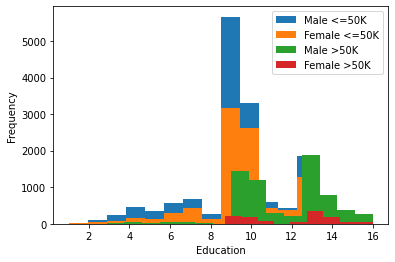

In [14]:
schoolgenderDis(data)
print("Males seem to dominate the field when it comes to income, but the trends among both genders are the same as above.")

In [15]:
# 4(e)
def ageDis(data):
    # distribution by education and income only
    poorDis = data['age'][data['prediction'] == '<=50K'].plot.hist(bins = 10, legend = True, grid = False)
    richDis = data['age'][data['prediction'] == '>50K'].plot.hist(bins = 10,legend = True, grid = False)
    pp.legend(['<=50K', '>50K'])
    pp.title('"Age" Income Distribution')
    pp.ylabel('Frequency')
    pp.xlabel('Age')

Age seems to play an important role in income distributions.
The best zones appear to be between the ages of 30 and 60.
The younger you are, the more likely you will have a poor income.
This is expected because younger people don't have their career jobs yet...usually.




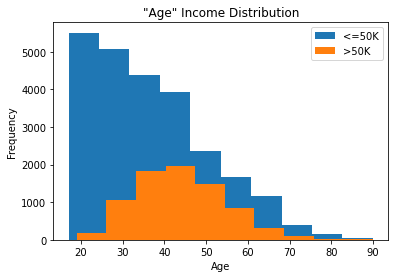

In [16]:
ageDis(data)
print("Age seems to play an important role in income distributions.\nThe best zones appear to be between the ages of 30 and 60.")
print("The younger you are, the more likely you will have a poor income.\nThis is expected because younger people don't have their career jobs yet...usually.\n\n")

In [17]:
# 4(e) part 2
def agegenderDis(data):
    poormanDis = data['age'][data['sex'] == 'Male'][data['prediction'] == '<=50K'].plot.hist(bins = 20)
    poorwomanDis = data['age'][data['sex'] == 'Female'][data['prediction'] == '<=50K'].plot.hist(bins = 20)
    richmanDis = data['age'][data['sex'] == 'Male'][data['prediction'] == '>50K'].plot.hist(bins = 20)
    richwomanDis = data['age'][data['sex'] == 'Female'][data['prediction'] == '>50K'].plot.hist(bins = 20)
    pp.legend(['Male <=50K', 'Female <=50K', 'Male >50K', 'Female >50K'])
    pp.title('"Age & Gender" Income Distribution')
    pp.ylabel('Frequency')
    pp.xlabel('Age')
    

When we add 'age' to our parameters,
we see that males from age ~30-55 years make of majority of the 'wealthy' population
Females also have a higher wealthy trend, but not nearly as dominate as the male population.
This is somewhat caused by the fact that there is nearly a 2:1 male to female ratio in our data set.



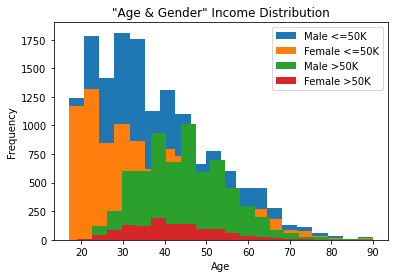

In [18]:
agegenderDis(data)
print("When we add 'age' to our parameters,\nwe see that males from age ~30-55 years make of majority of the 'wealthy' population")
print("Females also have a higher wealthy trend, but not nearly as dominate as the male population.")
print("This is somewhat caused by the fact that there is nearly a 2:1 male to female ratio in our data set.\n====================================================================================================\n")

In [19]:
# 5(a)
def bar(data):
    # get data
    w = data[['marital_status', 'prediction']][data['prediction'] == '>50K'].groupby('marital_status').count()
    p = data[['marital_status', 'prediction']][data['prediction'] == '<=50K'].groupby('marital_status').count()
    
    # make new data frame...well supposed to, but it is giving me this extremely weird error :(
    r = p.DataFrame()

In [20]:
bar(data)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [21]:
# 6(a)
def gen_pred_relation(data):
    # find values
    wealth = data[['sex','prediction']][data['prediction'] == '>50K'].groupby('sex').count()
    poor = data[['sex', 'prediction']][data['prediction'] == '<=50K'].groupby('sex').count()
    total = data[['sex', 'prediction']].groupby('sex').count()
    
    # created new data frame
    rela = p.DataFrame()
    rela['wealth'] = wealth
    rela['poor'] = poor
    rela['total'] = total
    
    # create bar graph to show 
    rela.plot.bar()
    pp.legend(['Wealthy', 'Poor', 'Total'])
    pp.title('Gender & Income Relation')
    pp.ylabel('Frequency')
    pp.xlabel('Gender')
    
def gen_por_values(data):
    # find values
    wealth = data[['sex','prediction']][data['prediction'] == '>50K'].groupby('sex').count()
    poor = data[['sex', 'prediction']][data['prediction'] == '<=50K'].groupby('sex').count()
    total = data[['sex', 'prediction']].groupby('sex').count()
    
    # find proportion of each gender's wealth gap
    pro = p.DataFrame()
    pro['w'] = wealth / total
    pro['p'] = poor / total
    
    # make bar graph
    pro.plot.bar()
    pp.legend(['% Wealthy', ' % Poor'])
    pp.title('Gender & Income Proportion')
    pp.ylabel('Percent')
    pp.xlabel('Gender')    
    
    print(pro)
    print("\n\n")

The relationship between gender and income is quite interesting.
As you can see, the general distribution goes as follows:


There are more people whom make <=50K a year for both genders,


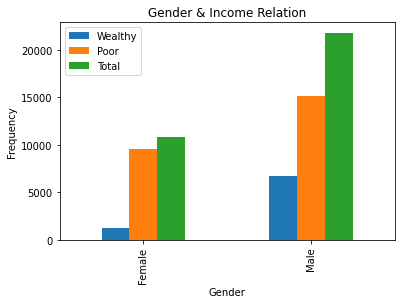

In [22]:
gen_pred_relation(data)
# Explaination
print("The relationship between gender and income is quite interesting.\nAs you can see, the general distribution goes as follows:\n================================================================\n\n")
print("There are more people whom make <=50K a year for both genders,")

               w         p
sex                       
Female  0.109461  0.890539
Male    0.305737  0.694263



However, as seen above, the porportion of wealthy males is much larger than wealthy females.
So although both trends are similar, males are ~3x more likely to make >50K annually


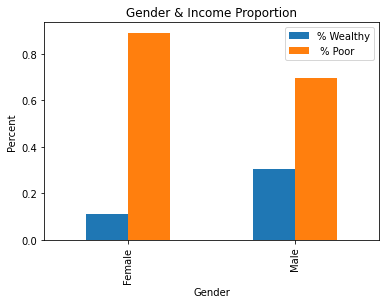

In [23]:
gen_por_values(data)
print("However, as seen above, the porportion of wealthy males is much larger than wealthy females.\nSo although both trends are similar, males are ~3x more likely to make >50K annually")

In [42]:
# 6(b) Wasn't exactly sure how to go about this problem, so I just displayed the counts for them
def gen_occ(data):
    # find values 
    pmOcc = data['occupation'][(data['sex'] == 'Male') & (data['prediction'] == '<=50K')].groupby('occupation').count()
    wmOcc = data['occupation'][data['sex'] == 'Male'][data['prediction'] == '>50K'].count()
    pwOcc = data['occupation'][data['sex'] == 'Female'][data['prediction'] == '<=50K'].count()
    wwOcc = data['occupation'][data['sex'] == 'Female'][data['prediction'] == '>50K'].count()
    
    print(pmOcc)
    print(wmOcc)
    print(pwOcc)
    print(wwOcc)
    
    

In [48]:

#gen_occ(data)
data[['occupation', 'age']][(data['sex'] == 'Male') & (data['prediction'] == '<=50K')].groupby('occupation').count()

,age
occupation,
?,863
Adm-clerical,938
Armed-Forces,8
Craft-repair,2968
Exec-managerial,1219
Farming-fishing,816
Handlers-cleaners,1124
Machine-op-inspct,1222
Other-service,1409


In [30]:
# 6(c)
def rich_country(data):
    # get needed data
    rich = data[data['prediction'] == '>50K']
    poor = data[['native-country', 'occupation', 'prediction']][data['prediction'] == '<=50K']
    
    country = p.DataFrame()
    print(country)

In [31]:
rich_country(data)

Empty DataFrame
Columns: []
Index: []


In [28]:
# 6(d)
def race_edu(data):
    # get unique races
    #print(data['race'].unique())
    
    # get data for each race
    w = data[data['race'] == 'White'][['education-num', 'prediction']]
    b = data[data['race'] == 'Black'][['education-num', 'prediction']]
    ap = data[data['race'] == 'Asian-Pac-Islander'][['education-num', 'prediction']]
    ai = data[data['race'] == 'Amer-Indian-Eskimo'][['education-num', 'prediction']]
    o = data[data['race'] == 'Other'][['education-num', 'prediction']]
    
    #create new data frame
    
    w.plot.hist(bins = 16, title = "White")
    b.plot.hist(bins = 16, title = "Black")
    ap.plot.hist(bins = 16, title = "Asian-Pac-Islander")
    ai.plot.hist(bins = 16, title = "Amer-Indian-Eskimo")
    o.plot.hist(bins = 16, title = "Other")

I couldn't figure out how to get python to make a dataFrame with 3 attributes, so I gave each race their own histogram.
These graphs show the distribution of education levels among each of the 5 categories of race.


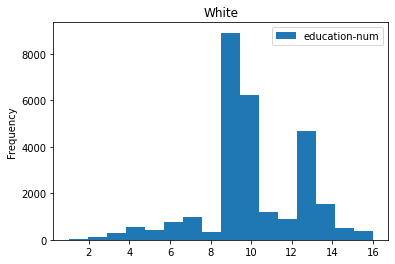

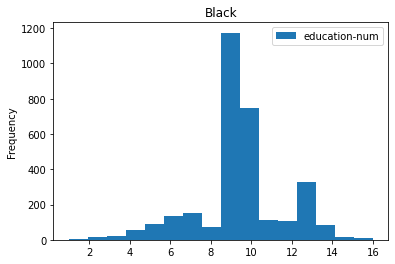

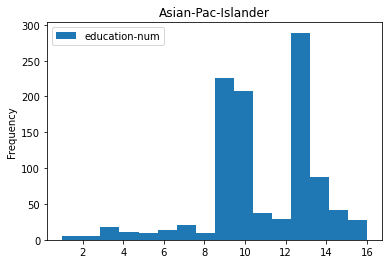

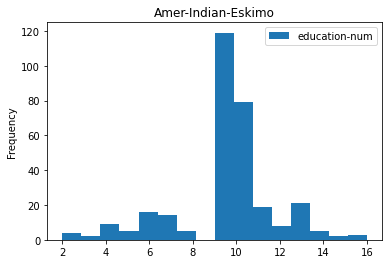

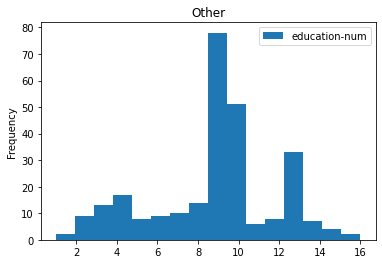

In [29]:
race_edu(data)
print("I couldn't figure out how to get python to make a dataFrame with 3 attributes, so I gave each race their own histogram.")
print("These graphs show the distribution of education levels among each of the 5 categories of race.")